In [1]:
import numpy as np 
import pandas as pd 
from enum import Enum
import statsmodels.api as sm

https://catalogofbias.org/biases/collider-bias/

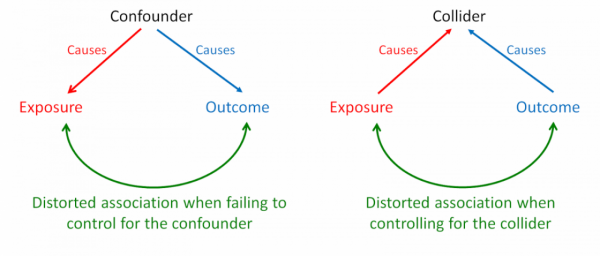

In [2]:
class Parameters(Enum):
    FemaleSeed = 0.5 
    RandomSeed = 18
    N = 10_000
    Epsilon = {'loc': 0, 'scale':1 , 'size': 10_000}

In [3]:
# Set Random Seed 
np.random.seed(Parameters.RandomSeed.value)

In [9]:
# Setting up epsilons 
occ_epsilon = np.random.normal(**Parameters.Epsilon.value)
wage_epsilon = np.random.normal(**Parameters.Epsilon.value)

# Data generation 
female = np.random.rand(Parameters.N.value)
female[female > 0.5] = 1 
female[female <= 0.5] = 0 

ability = np.random.normal(**Parameters.Epsilon.value)
occupation = 2*ability + 0 * female + (-2)*female + occ_epsilon
wage = (-1)*female + occupation + 2*ability + wage_epsilon

# Reshape to column vectors 
female = female.reshape(-1,1)
ability = ability.reshape(-1,1)
occupation = occupation.reshape(-1,1)
wage = wage.reshape(-1,1)
const = np.array([1]*Parameters.N.value).reshape(-1,1)


# Data 
data = np.concatenate([female, ability, occupation, wage, const], axis=1)
columns = ['female', 'ability', 'occupation', 'wage', 'const']
data = pd.DataFrame(data, columns=columns)

In [10]:
data.head()

,female,ability,occupation,wage,const
0,1.0,-0.191725,-2.173021,-4.609090,1.0
1,1.0,0.698896,-0.623550,-0.551620,1.0
2,1.0,-0.958801,-3.489752,-4.812213,1.0
3,1.0,0.542317,-1.634204,-0.164674,1.0
4,0.0,-2.418090,-4.412215,-8.555102,1.0


In [11]:
# Regress Wage ~ Female 
# Biased Unconditional 
X = data[['const','female']]
y = data['wage']
model1 = sm.OLS(y, X)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1148.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):          2.27e-238
Time:                        21:47:21   Log-Likelihood:                -28710.
No. Observations:               10000   AIC:                         5.742e+04
Df Residuals:                    9998   BIC:                         5.744e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0835      0.061     -1.371      0.1

In [12]:
# Regress Wage ~ Female + Occupation 
# Biased Conditional 
X = data[['const','female', 'occupation']]
y = data['wage']
model1 = sm.OLS(y, X)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 5.151e+04
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:47:21   Log-Likelihood:                -17128.
No. Observations:               10000   AIC:                         3.426e+04
Df Residuals:                    9997   BIC:                         3.428e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.019      0.089      0.9

In [17]:
# Regress Wage ~ Female + Occupation + Ability 
# Unbiased Conditional 
X = data[['const','female', 'ability', 'occupation']]
y = data['wage']
model1 = sm.OLS(y, X)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 6.279e+04
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:49:34   Log-Likelihood:                -14288.
No. Observations:               10000   AIC:                         2.858e+04
Df Residuals:                    9996   BIC:                         2.861e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9926      0.017     57.263      0.0

# Conclusion

Occupation is a collider effect. We anticipate the effect of gender to be -1 but we get different direction entirely. Once we control for it we get the true results